In [15]:
import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_13748\1292496605.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["medv"], fit = norm)


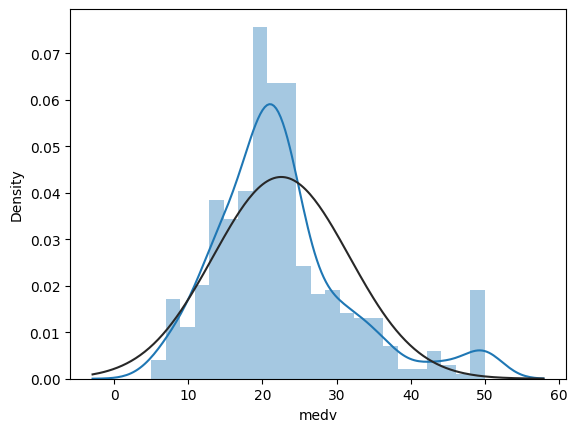

In [12]:
from scipy.stats import norm
sns.distplot(df["medv"], fit = norm)
plt.show()

In [10]:
sns.__version__

'0.13.0'

{'whiskers': [<matplotlib.lines.Line2D at 0x1c81d18f150>,
 'caps': [<matplotlib.lines.Line2D at 0x1c81d18cf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c81d186d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c81a99ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c81d425250>],
 'means': []}

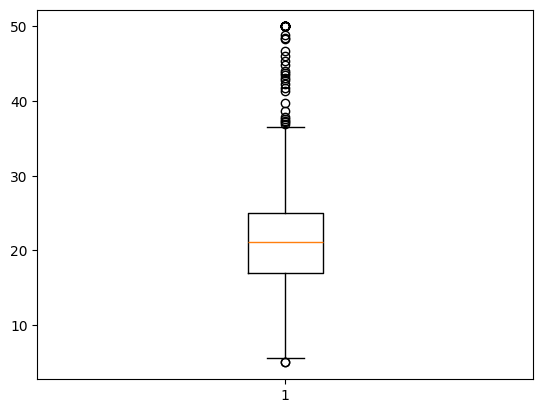

In [13]:
plt.boxplot(df["medv"])

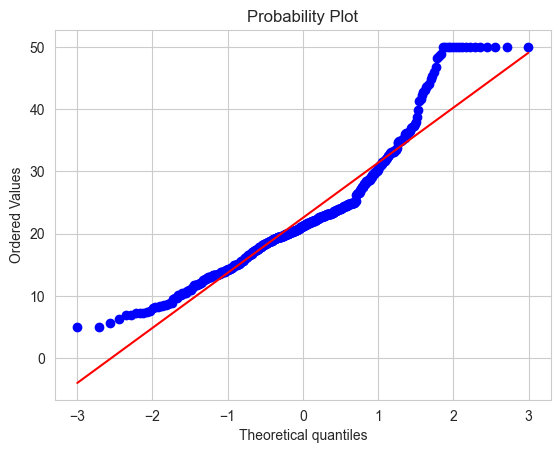

In [17]:
from scipy import stats 
sns.set_style("whitegrid")
stats.probplot(df["medv"], plot = plt)
plt.show()

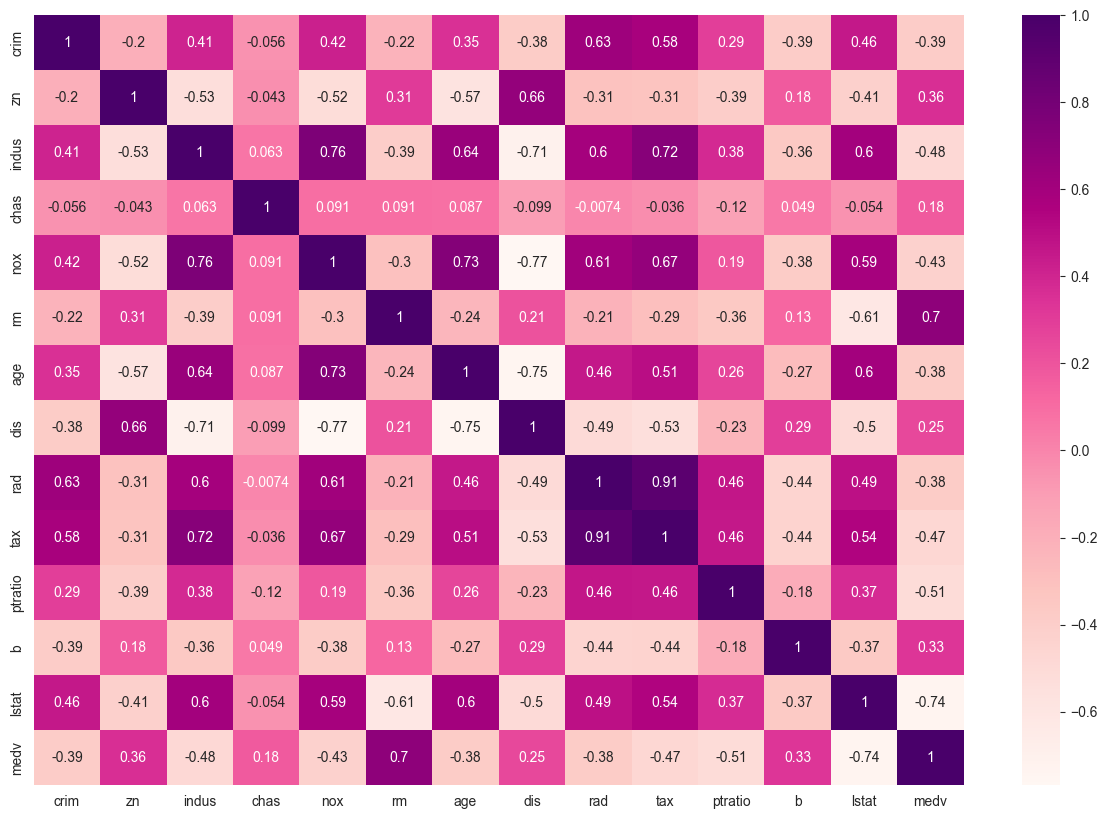

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True , cmap = "RdPu")
plt.show()

#### hypothesis testing


### T test independent 

In [22]:
from scipy.stats import ttest_ind
_,p_value = ttest_ind(df[df["chas"] == 0]["medv"], df[df["chas"] == 1]["medv"])

In [23]:
alpha = 0.05

In [24]:
if p_value <= alpha:
    print("Reject H0,There is no differnce in mean value of MEDV (House Price) bounded by Chales River.")
else :
    print("Failed to reject H0,there is differnce in mean of MEDV (House Price) bounded by Charles River.")

Reject H0,There is no differnce in mean value of MEDV (House Price) bounded by Chales River.


### Features and Target Value 

In [26]:
X = df.drop(["rad", "medv"], axis = 1)
#Target Value
Y = df["medv"]

In [29]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test  = train_test_split(X,Y , test_size= 0.20 , random_state= 4)

In [30]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,398,15.2,390.49,2.87
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,437,21.2,392.04,21.32
251,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,330,19.1,377.07,3.59
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,307,21.0,396.90,8.26
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,244,15.9,386.34,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,666,20.2,396.90,30.81
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,329,12.6,354.31,8.61
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,666,20.2,396.90,22.88
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,296,16.6,393.23,9.64


In [31]:
from sklearn.preprocessing import MinMaxScaler
sclaer = MinMaxScaler(feature_range= (0,1))
x_train_sclear = sclaer.fit_transform(x_train)
x_test_scaler = sclaer.transform(x_test)

In [33]:
x_train_sclear


array([[9.02777434e-04, 4.50000000e-01, 1.00000000e-01, ...,
        2.76595745e-01, 9.83836805e-01, 3.14569536e-02],
       [2.73665650e-03, 0.00000000e+00, 7.83333333e-01, ...,
        9.14893617e-01, 9.87745222e-01, 5.40562914e-01],
       [2.33528471e-03, 2.20000000e-01, 1.89629630e-01, ...,
        6.91489362e-01, 9.49997478e-01, 5.13245033e-02],
       ...,
       [1.05477382e-01, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 1.00000000e+00, 5.83609272e-01],
       [8.78387158e-04, 0.00000000e+00, 1.22592593e-01, ...,
        4.25531915e-01, 9.90745877e-01, 2.18267108e-01],
       [9.74149903e-04, 0.00000000e+00, 9.22592593e-01, ...,
        6.91489362e-01, 9.52569469e-01, 4.47019868e-01]])

### Linear  Regression 

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(x_train_sclear, y_train)

LinearRegression()

In [36]:
lin_reg.score(x_test_scaler,y_test)

0.7132954918444501

In [37]:
lin_reg.coef_

array([ -6.61429426,   4.01794336,  -2.03618165,   3.65221297,
        -6.89635809,  21.35959963,  -1.37134315, -17.17843698,
        -0.10538581,  -7.43831004,   2.96948758, -16.68917368])

In [38]:
lin_reg.intercept_

26.225325764193986

In [39]:
yhat = lin_reg.predict(x_test_scaler)

In [41]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
r2_score(y_test,yhat)

0.7132954918444501

In [42]:
mean_absolute_error(y_test,yhat)

3.3611017737967783

In [43]:
mean_squared_error(y_test, yhat)

26.63175937643093

In [45]:
np.sqrt(mean_squared_error(y_test, yhat))

5.160596804288331

In [46]:
y_test

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: medv, Length: 102, dtype: float64

In [47]:
yhat

array([11.38993743, 26.06052683, 18.15196516, 17.94789654, 36.41968615,
       25.53058133, 29.89625901, 18.52644648, 19.32578718, 24.21243156,
       29.25024998, 27.90829658, 19.18207641, 33.02831906, 21.6972138 ,
       15.21154807, 20.70868541, 10.96242992, 11.22855403, 14.20353231,
        7.97265671, 18.19761787, 18.75929336, 23.7622226 , 17.67438147,
       21.52899843, 17.63112557, 15.51020024, 20.5243466 , 18.62847719,
       14.1457638 , 24.1707861 , 33.87047833, 20.25196486, 15.92067661,
       19.52283076, 31.52667157, 35.27195895, 22.36435114, 24.67914927,
       38.00496502, 32.62758317, 18.67429048, 32.48256567, 33.10109027,
       25.45344318, 40.0614985 , 17.53886012, 18.6220132 , 23.50068352,
       32.67385652, 26.40235387, 17.44815527, 27.46439579, 14.84004533,
       24.472717  , 25.80915543, 32.95444366, 17.45421097, 36.39957136,
       16.99585486, 17.88537518, 33.06246974, 19.82359959, 38.55349366,
       27.02895696, 31.52958156, 10.19569898, 17.99753789, 20.65